In [1]:
import csv
import numpy
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
%matplotlib inline

In [2]:
# File names
teams_file = "Data//Teams.csv"
ballparks_file = "Data//Ballparks.csv"

path = "Data//Retrosheet//GL"
startyr = 1970
endyr = 2016

In [3]:
# Indicies
# game logs
teamx, vscorex, hscorex, parkx, attx  = 6, 9, 10, 16, 17

# teams_file
yrx, teamidx, gx, home_gx, wx, lx = 0, 2, 6, 7, 8, 9
team_namex, avg_attx = 40, 42

# ballparks
park_namex, capx = 1, 5

In [4]:
def readcsv(fname):
    f = open(fname, 'r')
    reader = csv.reader(f)
    lines = list(reader)
    f.close()
    return lines

In [21]:
class Team:
    def __init__(self, team_name, teamid):
        self.name = team_name
        self.teamid = teamid
        self.years = {}
    def addGame(self, game, year, cap):
        if year not in self.years:
            self.years[year] = YearData(year, cap)
        self.years[year].addGame(game)
    def setStats(self):
        for yr in self.years:
            year = self.years[yr]
            year.setAvgAtt()
            year.setAttPct()
            year.setWinPct()

In [22]:
class YearData:
    def __init__(self, year, cap):
        self.year = year
        self.park_capacity = cap
        self.avg_att = 0
        self.att_pct = 0
        self.win_pct = 0
        self.games = []
    def addGame(self, line):
        self.games.append(line)
    def setAvgAtt(self):
        num_games = len(self.games)
        total_att = 0
        for i in range(0, num_games):
            total_att += int(self.games[i][attx])
        self.avg_att = total_att / num_games
    def setAttPct(self):
        num_games = len(self.games)
        actual_att = self.avg_att * num_games
        possible_att = self.park_capacity * num_games
        self.att_pct = actual_att / possible_att
    def win(self, game):
        if game[hscorex] > game[vscorex]:
            return True
        else:
            return False
    def setWinPct(self):
        wins = 0
        num_games = len(self.games)
        for i in range(0, num_games):
            game = self.games[i]
            if self.win(game):
                wins += 1
        self.win_pct = wins / num_games

In [23]:
def build_teamid_ref(lines):
    d = {}
    for line in lines:
        teamid = line[teamidx]
        if teamid not in d:
            d[teamid] = line[team_namex]
    return d

In [24]:
def build_park_ref(lines):
    d = {}
    for line in lines:
        park = line[park_namex]
        if park not in d:
            capacity = line[capx].replace(',','')
            d[park] = int(capacity)
    return d

In [25]:
# builds a dictionary -> {teamid: Team, ...}
def build_teams_dict():
    # create the teamid dictionary for refference
    team_lines = readcsv(teams_file)
    park_lines = readcsv(ballparks_file)
    team_ref = build_teamid_ref(team_lines[1:])
    parks_ref = build_park_ref(park_lines[1:])
    
    teams = {}
    for yr in range(startyr, (endyr + 1)):
        yr_file = path + str(yr) + ".csv"
        games = readcsv(yr_file)
        for game in games:
            # add valid data
            park = game[parkx]
            if park and park in parks_ref:
                cap = parks_ref[park]
                if game[attx] and int(game[attx]) > 0:
                    # check if team is in team dict or not
                    teamid = game[teamx]
                    team_name = team_ref[teamid]
                    if teamid not in teams:
                        teams[teamid] = Team(team_name, teamid)
                    # add game data to proper team
                    teams[teamid].addGame(game, yr, cap)

    # set attendance and win percentages
    for team in teams:
        teams[team].setStats()
    
    return teams

In [37]:
def attendancePct_vs_winningPct(team):
    attendancePct = []
    winningPct = []
    for y in team.years:
        year = team.years[y]
        attendancePct.append(year.att_pct)
        winningPct.append(year.win_pct)
    # plot the data
    yrs = team.years.keys()
    minYr = str(min(yrs))
    maxYr = str(max(yrs))
    xlabel = "Attendance Percentage"
    ylabel = "Winning Percentage"
    title = team.name + "(" + minYr + "-" + maxYr + "): Winning Pct. VS Attendance Pct."
    plot_data(attendancePct, winningPct, xlabel, ylabel, title)

In [41]:
def plot_data(X, Y, xlabel, ylabel, title):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.plot(X, Y, '.')
    
    corr = pearsonr(X, Y)
    print(title, "Correlation:", round(corr[0] * 100, 2))

In [42]:
teams = build_teams_dict()

Anaheim Angels(1997-2016): Winning Pct. VS Attendance Pct. Correlation: 26.95
Arizona Diamondbacks(1998-2016): Winning Pct. VS Attendance Pct. Correlation: 13.13
Atlanta Braves(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 64.26
Baltimore Orioles(1970-2015): Winning Pct. VS Attendance Pct. Correlation: -39.94
Boston Americans(1970-2016): Winning Pct. VS Attendance Pct. Correlation: -5.53
California Angels(1970-1996): Winning Pct. VS Attendance Pct. Correlation: 21.72
Chicago White Sox(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 22.75
Chicago White Stockings(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 19.3
Cincinnati Reds(1970-2016): Winning Pct. VS Attendance Pct. Correlation: -25.56
Cleveland Blues(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 50.55
Colorado Rockies(1993-2016): Winning Pct. VS Attendance Pct. Correlation: -0.16
Detroit Tigers(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 43.94
Florida Marlins(1993-2011): Winni

C:\Users\Keith\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


New York Mets(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 55.07
Oakland Athletics(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 50.61
Philadelphia Quakers(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 31.38
Pittsburg Alleghenys(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 4.11
San Diego Padres(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 41.03
Seattle Mariners(1977-2016): Winning Pct. VS Attendance Pct. Correlation: 41.76
San Francisco Giants(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 24.65
St. Louis Browns(1970-2016): Winning Pct. VS Attendance Pct. Correlation: 35.23
Tampa Bay Devil Rays(1998-2016): Winning Pct. VS Attendance Pct. Correlation: 16.46
Texas Rangers(1972-1993): Winning Pct. VS Attendance Pct. Correlation: 63.37
Toronto Blue Jays(1977-2016): Winning Pct. VS Attendance Pct. Correlation: 33.31
Washington Senators(2005-2016): Winning Pct. VS Attendance Pct. Correlation: 48.28
Washington Senators(1970-1

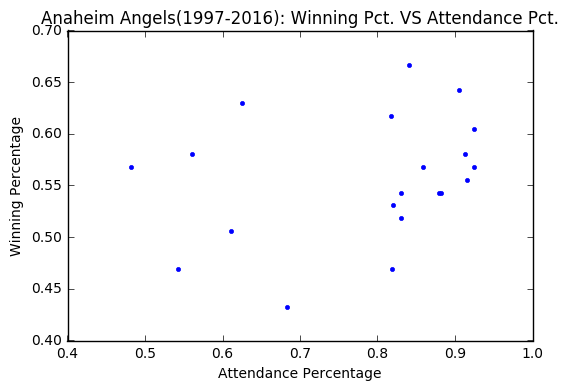

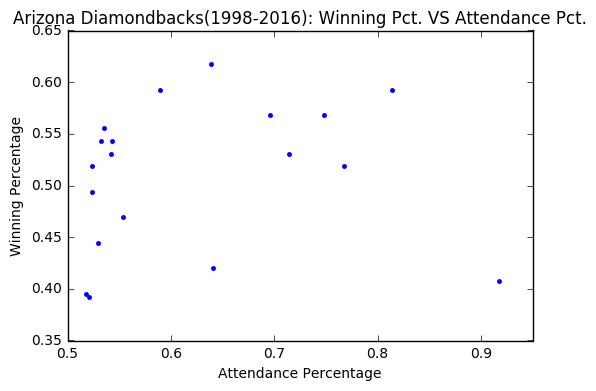

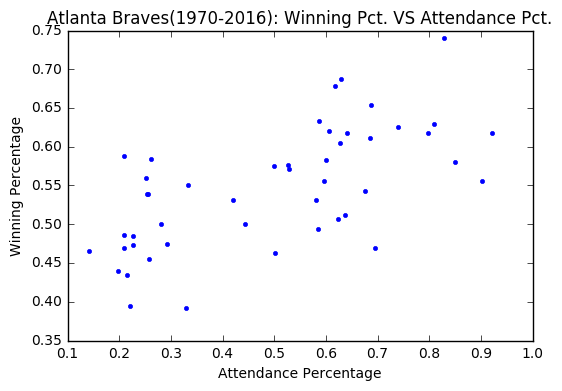

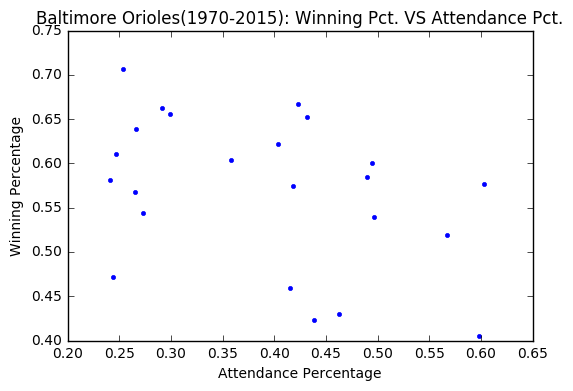

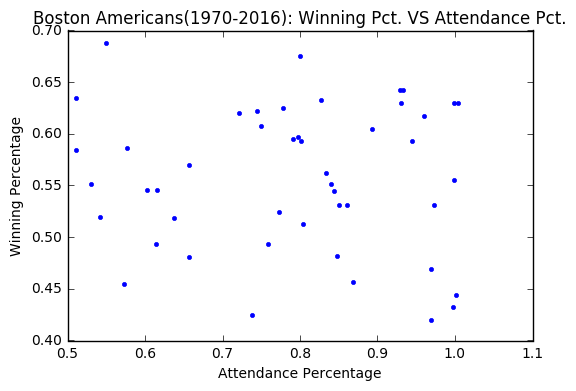

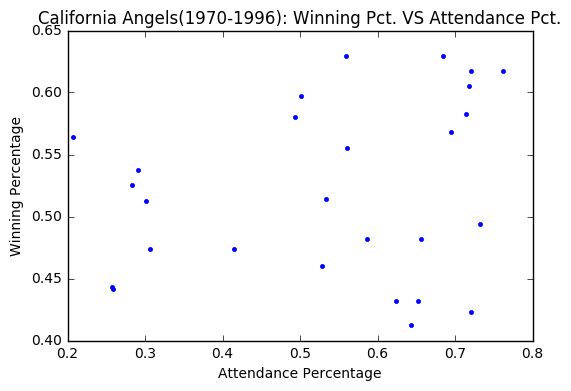

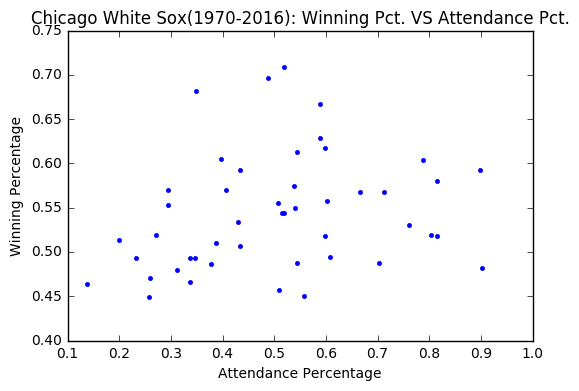

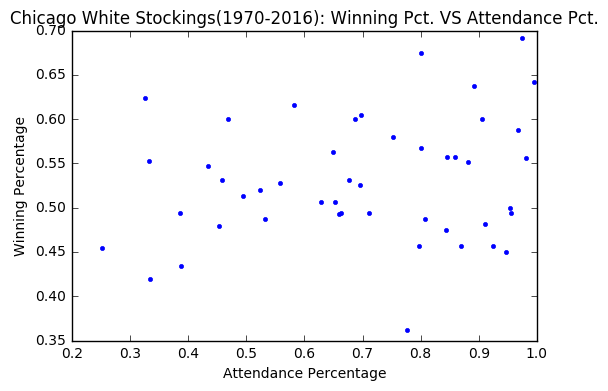

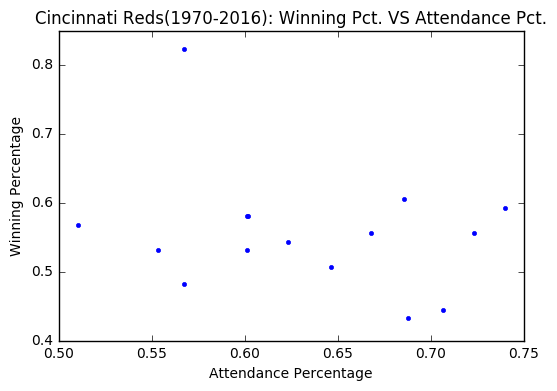

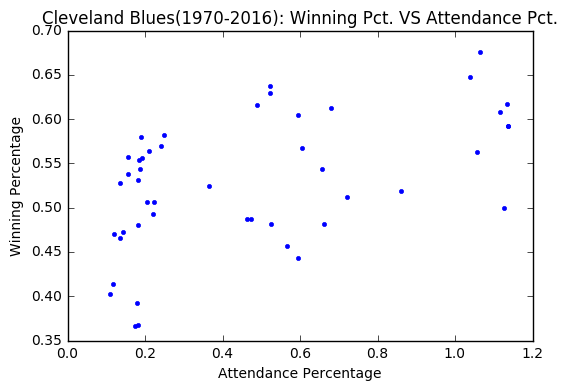

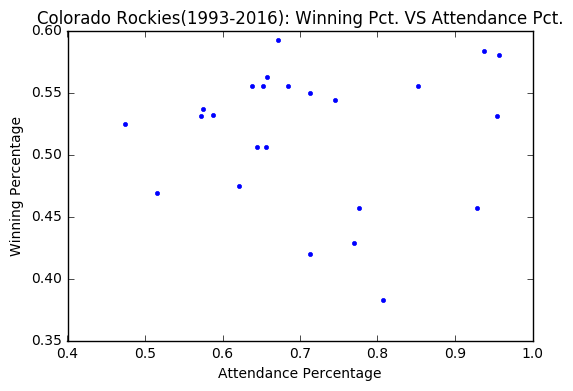

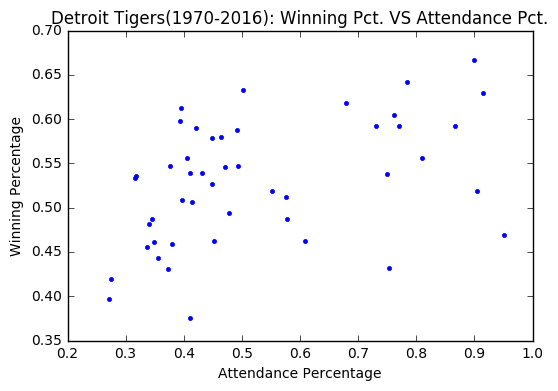

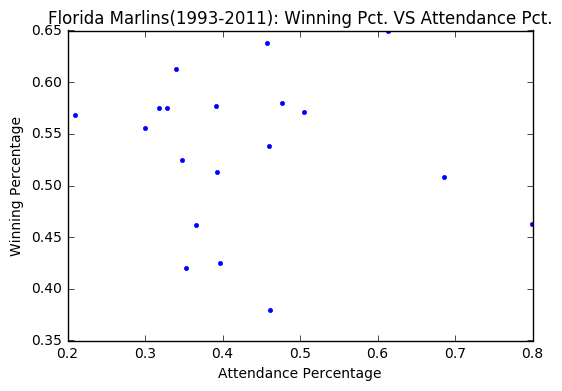

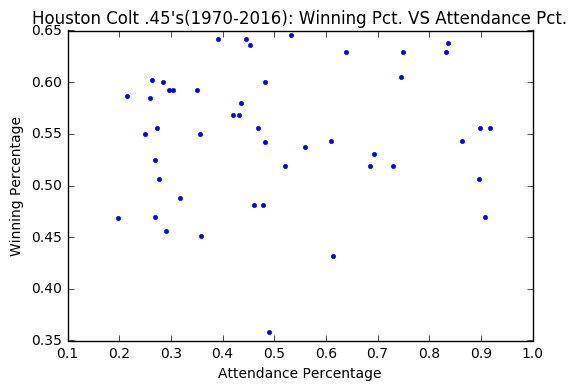

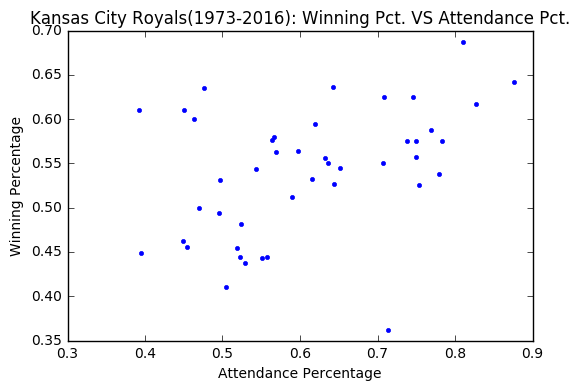

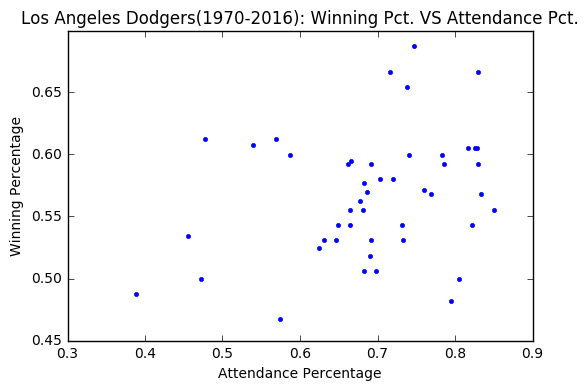

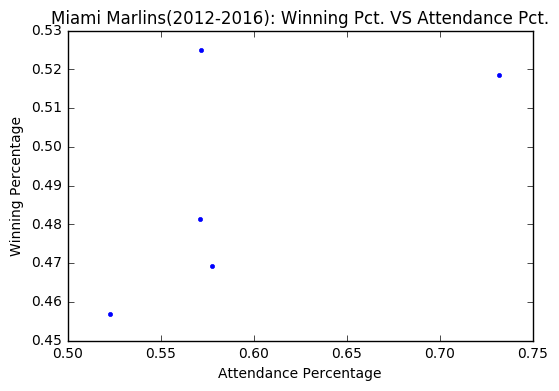

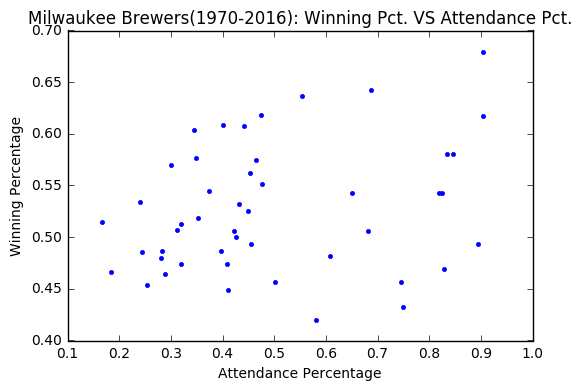

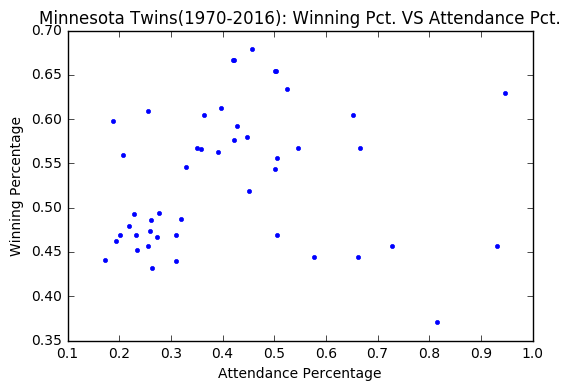

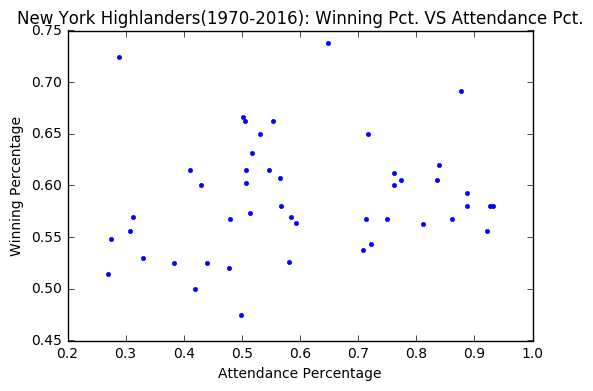

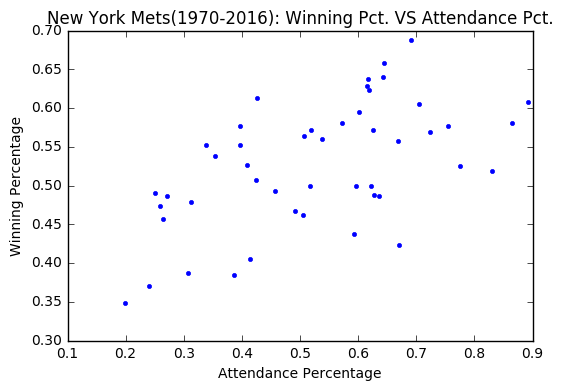

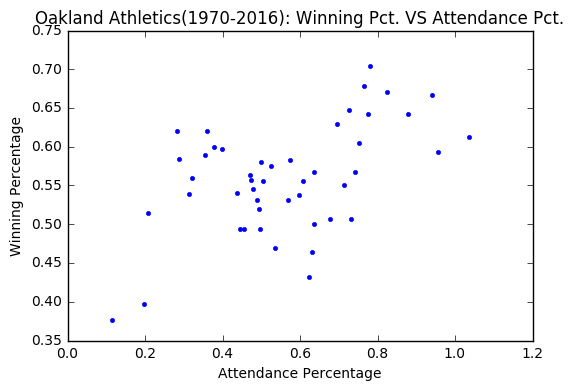

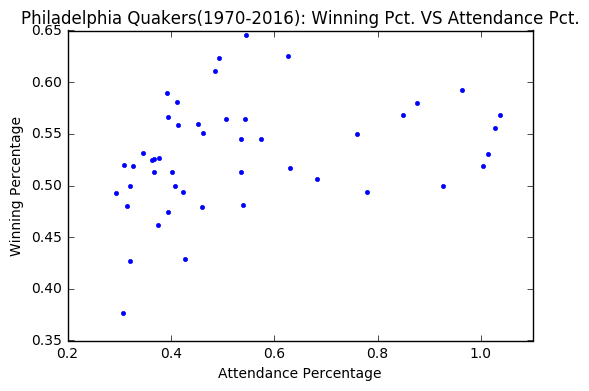

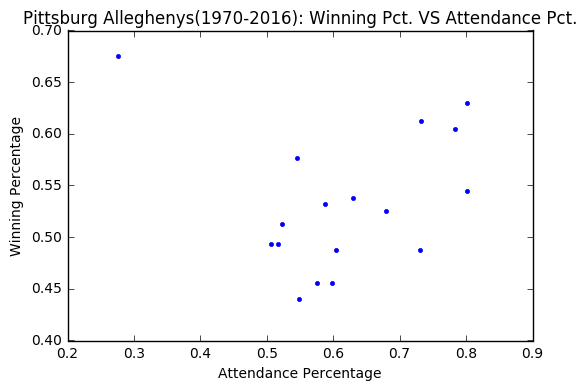

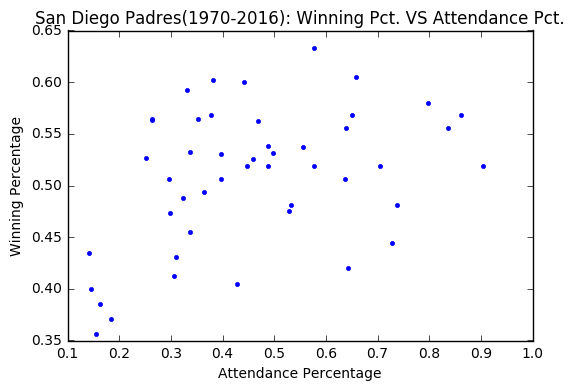

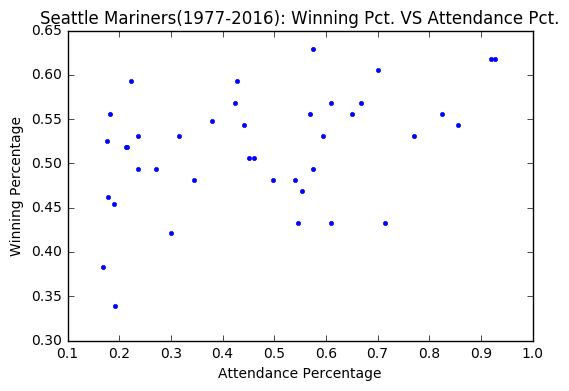

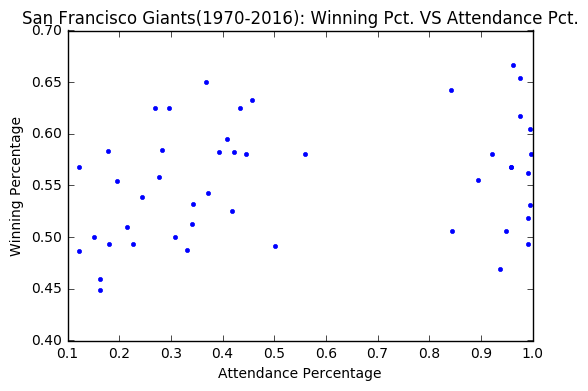

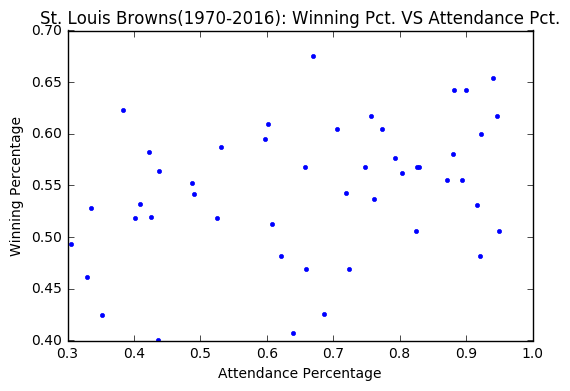

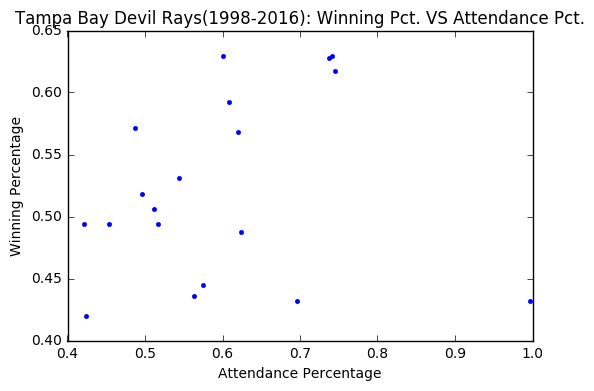

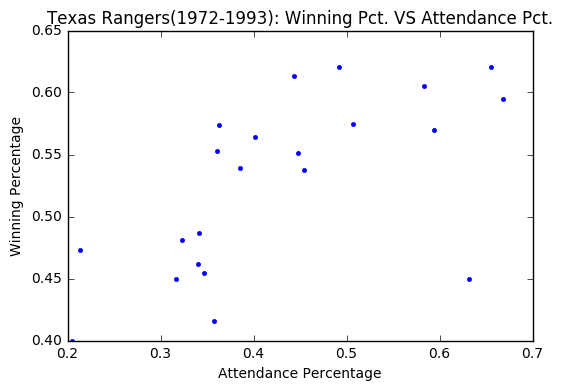

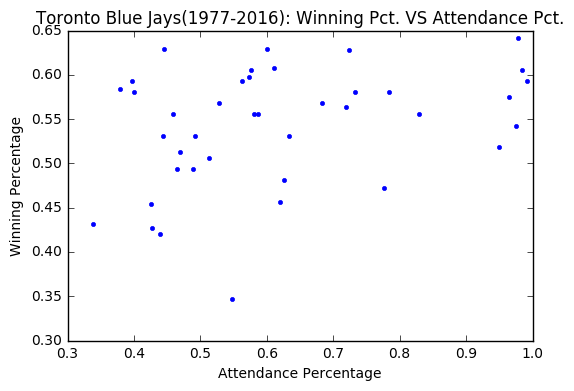

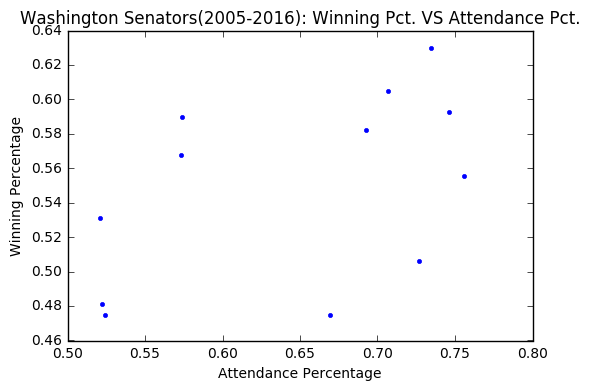

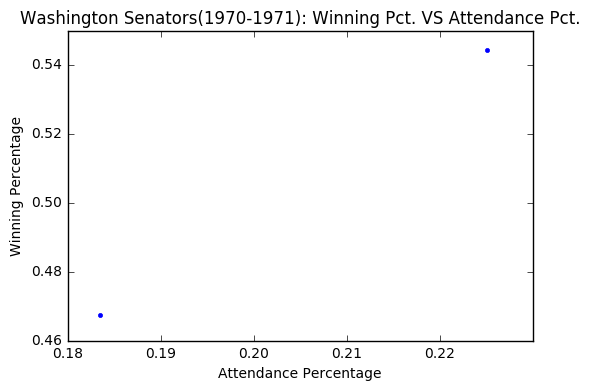

In [45]:
sortedTeams = sorted(teams.keys())
for tid in sortedTeams:
    team = teams[tid]
    attendancePct_vs_winningPct(team)